In [1]:
import re
import glob

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Concatenate all the files

Get all the original files which with no filters

In [2]:
# get path to all files
recon_path = 'data/spectra/reconstructed/rf/'

recon_files = sorted(glob.glob(recon_path + 'recon_param_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))

params_path = 'data/params/'
write_data = open(params_path + 'simulated_data_rf_5k.txt', 'w')

# read in all files
for file in recon_files:
    with open(file, 'r') as f:
        # skip the first 10 lines in each file
        for i in range(10):
            f.readline()
            # read in the data from each file
        data = f.readlines()
        # get the length of the data in each file
        length = len(data)
        # write the data to the output file in the same order as the files
        for i in range(length):
            write_data.write(data[i])
            
# close the files
write_data.close()

In [3]:
# sig_path = 'data/spectra/simulated_data/'
# sig_files = sorted(glob.glob(sig_path + 'model_parameters_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))

# # get the params data
# df_param = pd.DataFrame()
# for file in sig_files:
#     # get the parameters used
#     df_param = df_param.append(pd.read_csv(file, skiprows=1, nrows=6, header=None, sep=' ', names=['A', 'B', 'C', 'D']))
# # save the dataframe to a csv file
# df_param.to_csv(params_path + 'model_parameters_data_5K.csv', index=False)
# df_param.head()
    

#### Load the files 

In [6]:
df_recon = pd.read_csv(params_path + 'simulated_data_rf_5k.txt', sep=' ', header=None) # all reconstructed data dataframe
df_data = pd.read_csv(params_path + 'model_parameters_data_all_5K.txt', sep=' ', header=None) # all data dataframe
# df_data.head()

In [7]:
df_recon.shape, df_data.shape

((87000000, 2), (290000000, 2))

In [8]:
# get the last 15000 from the df_data datatrame, to get the 
# the data points that was used in the prediction of the parameterss
df_sig = df_data.iloc[-87000000:]

In [9]:
df_sig.head()

,0,1
203000000,238.60000,0.0
203000001,238.60001,0.0
203000002,238.60002,0.0
203000003,238.60003,0.0
203000004,238.60004,0.0


In [10]:
print("Recon Shape: ", df_recon.shape,"Original sig Shape: ", df_sig.shape)

Recon Shape:  (87000000, 2) Original sig Shape:  (87000000, 2)


In [11]:
columns = ['Frequency', 'Intensity']
df_recon.columns = columns
df_sig.columns =  columns 

In [12]:
df_sig.head()

,Frequency,Intensity
203000000,238.60000,0.0
203000001,238.60001,0.0
203000002,238.60002,0.0
203000003,238.60003,0.0
203000004,238.60004,0.0


In [13]:
df_recon.head()

,Frequency,Intensity
0,238.60000,0.0
1,238.60001,0.0
2,238.60002,0.0
3,238.60003,0.0
4,238.60004,0.0


In [14]:
# get the frequency and intensity of the original synthethic spectra
freq_sig = np.array(np.array_split(df_sig['Frequency'], len(recon_files)))
inten_sig = np.array(np.array_split(df_sig['Intensity'], len(recon_files)))


# get the frequency and intensity of the predicted spectra
freq_recon = np.array(np.array_split(df_recon['Frequency'], len(recon_files)))
inten_recon = np.array(np.array_split(df_recon['Intensity'], len(recon_files)))

In [17]:
# get the  signal index for the filtered signals
start_signal_index = 3501
signal_index = []
for i in range(len(recon_files)):
    signal_index += [start_signal_index + i] 

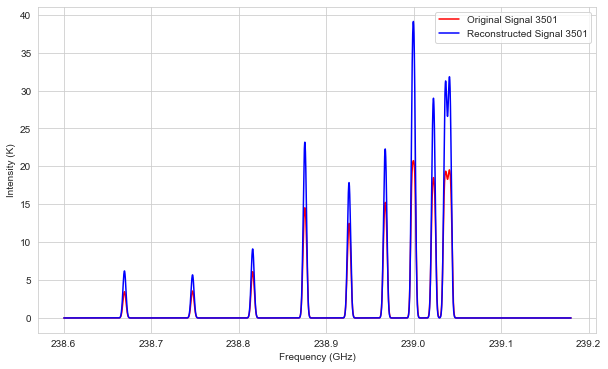

In [18]:
# plot the signal in one plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[0],  inten_sig[0], color='r', label='Original Signal {}'.format(signal_index[0]))
plt.plot(freq_recon[0], inten_recon[0], color='b', label="Reconstructed Signal {}".format(signal_index[0]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3501.png')
plt.show()

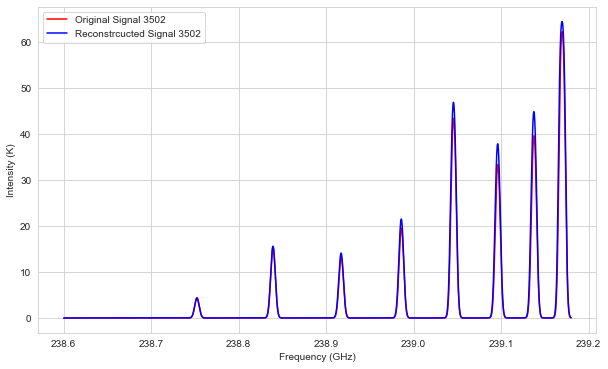

In [19]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1],  inten_sig[1], color='r', label='Original Signal {}'.format(signal_index[1]))
plt.plot(freq_recon[1], inten_recon[1], color='b', label="Reconstrcucted Signal {}".format(signal_index[1]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3502.png')
plt.show()

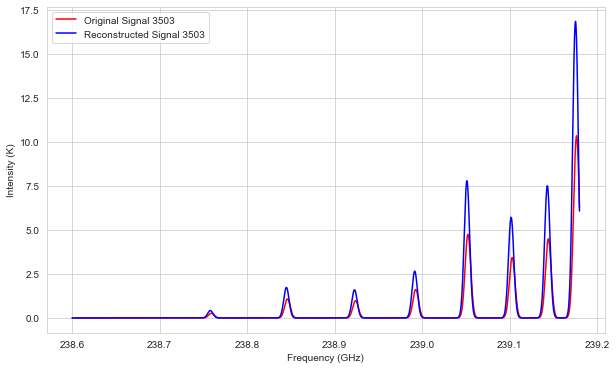

In [20]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[2],  inten_sig[2], color='r', label='Original Signal {}'.format(signal_index[2]))
plt.plot(freq_recon[2], inten_recon[2], color='b', label="Reconstructed Signal {}".format(signal_index[2]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3503.png')
plt.show()

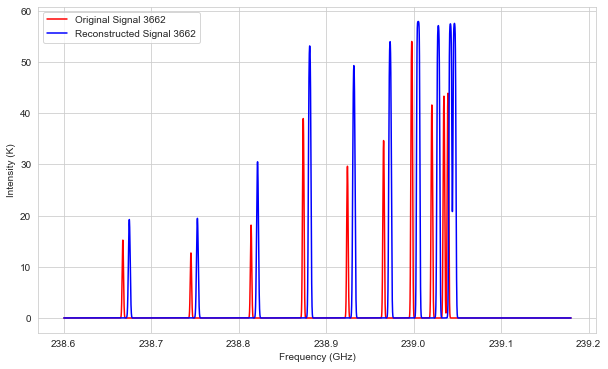

In [30]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[161],  inten_sig[161], color='r', label='Original Signal {}'.format(signal_index[161]))
plt.plot(freq_recon[161], inten_recon[161], color='b', label="Reconstructed Signal {}".format(signal_index[161]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3503.png')
plt.show()

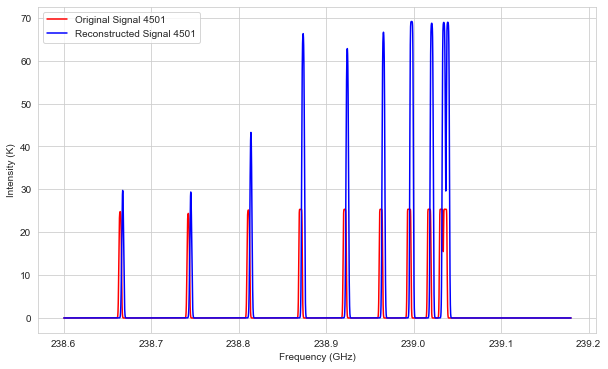

In [21]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1000],  inten_sig[1000], color='r', label='Original Signal {}'.format(signal_index[1000]))
plt.plot(freq_recon[1000], inten_recon[1000], color='b', label="Reconstructed Signal {}".format(signal_index[1000]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4500.png')
plt.show()

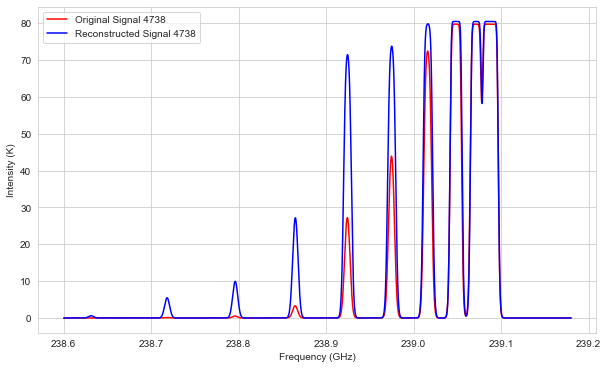

In [22]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1237],  inten_sig[1237], color='r', label='Original Signal {}'.format(signal_index[1237]))
plt.plot(freq_recon[1237], inten_recon[1237], color='b', label="Reconstructed Signal {}".format(signal_index[1237]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4737.png')
plt.show()

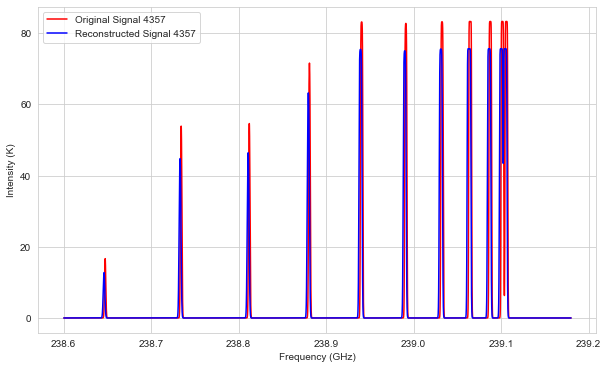

In [23]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[856],  inten_sig[856], color='r', label='Original Signal {}'.format(signal_index[856]))
plt.plot(freq_recon[856], inten_recon[856], color='b', label="Reconstructed Signal {}".format(signal_index[856]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4356.png')
plt.show()

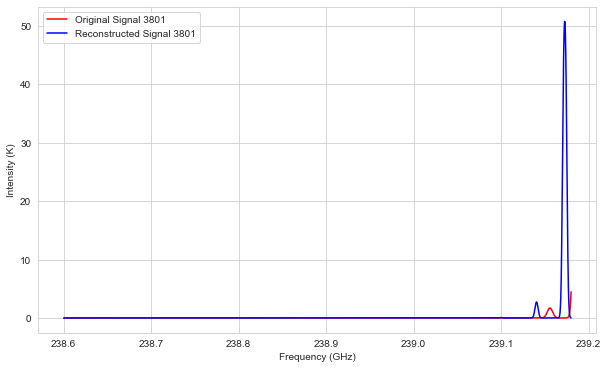

In [24]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[300],  inten_sig[300], color='r', label='Original Signal {}'.format(signal_index[300]))
plt.plot(freq_recon[300], inten_recon[300], color='b', label="Reconstructed Signal {}".format(signal_index[300]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

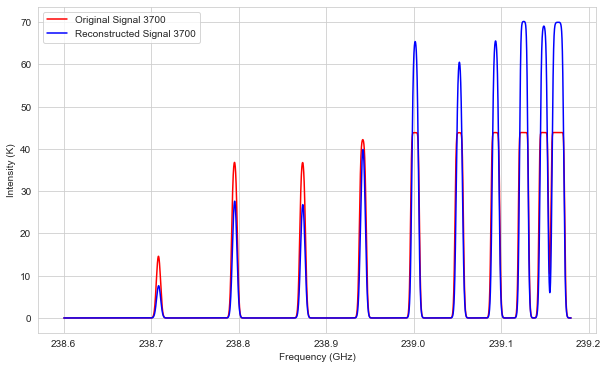

In [26]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[199],  inten_sig[199], color='r', label='Original Signal {}'.format(signal_index[199]))
plt.plot(freq_recon[199], inten_recon[199], color='b', label="Reconstructed Signal {}".format(signal_index[199]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

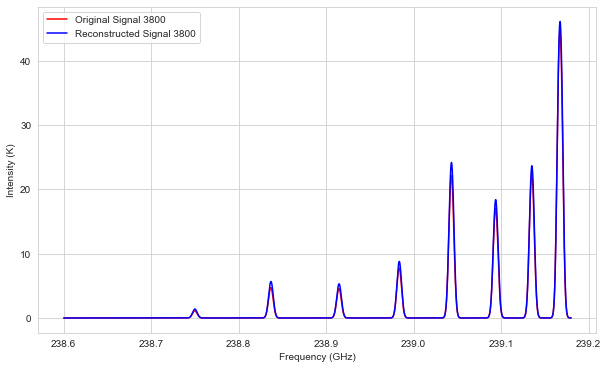

In [27]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[299],  inten_sig[299], color='r', label='Original Signal {}'.format(signal_index[299]))
plt.plot(freq_recon[299], inten_recon[299], color='b', label="Reconstructed Signal {}".format(signal_index[299]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

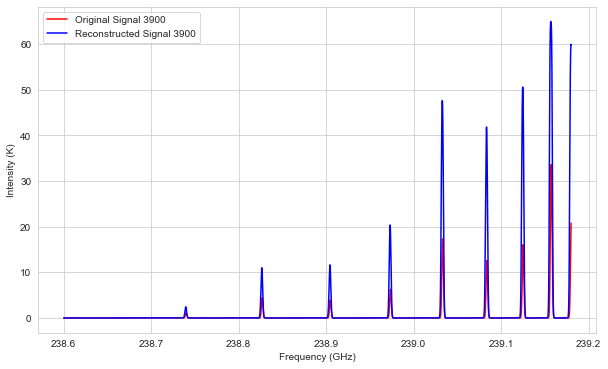

In [28]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[399],  inten_sig[399], color='r', label='Original Signal {}'.format(signal_index[399]))
plt.plot(freq_recon[399], inten_recon[399], color='b', label="Reconstructed Signal {}".format(signal_index[399]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

In [33]:
4800-4768
1299-32

1267

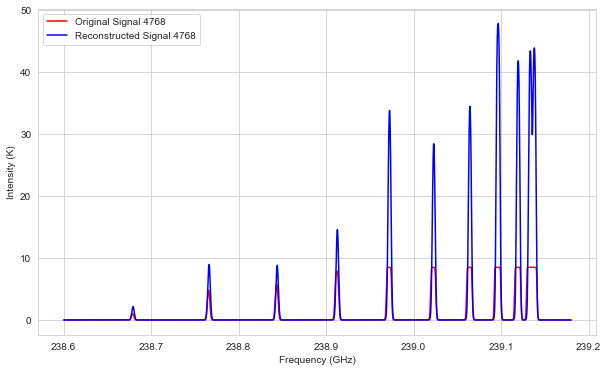

4768

In [34]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1267],  inten_sig[1267], color='r', label='Original Signal {}'.format(signal_index[1267]))
plt.plot(freq_recon[1267], inten_recon[1267], color='b', label="Reconstructed Signal {}".format(signal_index[1267]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()
4768

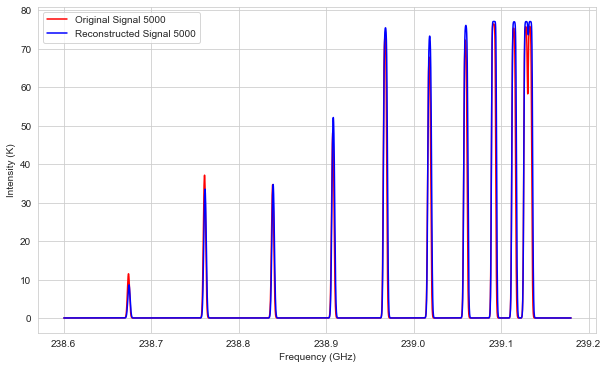

In [25]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1499],  inten_sig[1499], color='r', label='Original Signal {}'.format(signal_index[1499]))
plt.plot(freq_recon[1499], inten_recon[1499], color='b', label="Reconstructed Signal {}".format(signal_index[1499]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()
4768